# Fitting the model to whole dataset

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import cross_val_score as CVS

wine = ds.load_wine()
X = wine.data
y = wine.target

model_DTC = DTC(min_samples_leaf=3, random_state=1)
model_BC = BC(base_estimator=model_DTC, n_estimators=100, random_state=1)
model_ABC = ABC(base_estimator=model_DTC, n_estimators=100, algorithm='SAMME', random_state=1)
model_GBC = GBC(n_estimators=100, learning_rate=1.0, max_depth=1, subsample=0.5, random_state=1)

model_DTC.fit(X,y)
model_BC.fit(X,y)
model_ABC.fit(X,y)
model_GBC.fit(X,y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1,
                           subsample=0.5)

In [15]:
print("Decision tree scores:", CVS(model_DTC, X, y), '(avg:', np.mean(CVS(model_DTC, X, y)),')')
print("Bagging scores:", CVS(model_BC, X, y), '(avg:', np.mean(CVS(model_BC, X, y)), ')')
print("AdaBoost scores:", CVS(model_ABC, X, y), '(avg:', np.mean(CVS(model_ABC, X, y)), ')')
print("Gradient Boosting scores:", CVS(model_GBC, X, y), 'avg:', np.mean(CVS(model_GBC, X, y)),')')

Decision tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857] (avg: 0.8882539682539681 )
Bagging scores: [0.91666667 0.88888889 0.94444444 0.97142857 1.        ] (avg: 0.9442857142857143 )
AdaBoost scores: [0.94444444 0.94444444 0.97222222 0.97142857 1.        ] (avg: 0.9665079365079364 )
Gradient Boosting scores: [0.88888889 0.94444444 1.         0.97142857 1.        ] avg: 0.9609523809523809 )


# Computing the cumulative improvement and plotting

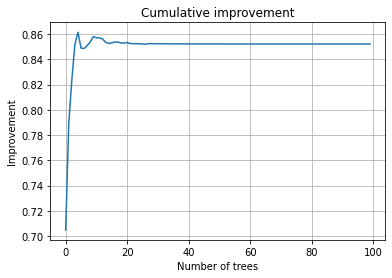

In [16]:
cumulative_improvement = np.cumsum(model_GBC.oob_improvement_)
plt.plot(cumulative_improvement)
plt.title('Cumulative improvement')
plt.xlabel('Number of trees')
plt.ylabel('Improvement')
plt.grid()
plt.show()